In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

# Undirected Graph

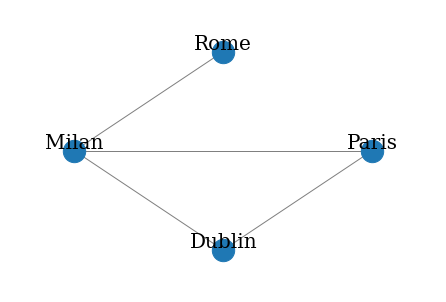

In [10]:
G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [113]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [114]:
{G.degree(v): v for v in G.nodes}

{2: 'Paris', 3: 'Milan', 1: 'Rome'}

In [115]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Paris': 2, 'Milan': 3, 'Rome': 1}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Paris': ['Milan', 'Dublin'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Rome': ['Milan']}


In [116]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Paris', 'Milan', 'Rome']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Milan', 'Rome')]


In [117]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Paris', 'Milan', 'Rome', 'London', 'Madrid']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Paris', 'Milan'), ('Paris', 'Madrid'), ('Milan', 'Rome'), ('Rome', 'London')]


# Directed Graph

In [1]:
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

NameError: name 'nx' is not defined

In [2]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

NameError: name 'draw_graph' is not defined

# Weighted Directed Graph

  source  target  weight
0  Paris  Dublin      11
1  Paris   Milan       8
2  Milan    Rome       5
3  Milan  Dublin      19
        Dublin  Paris  Milan  Rome
Dublin     0.0    0.0    0.0   0.0
Paris     11.0    0.0    8.0   0.0
Milan     19.0    0.0    0.0   5.0
Rome       0.0    0.0    0.0   0.0


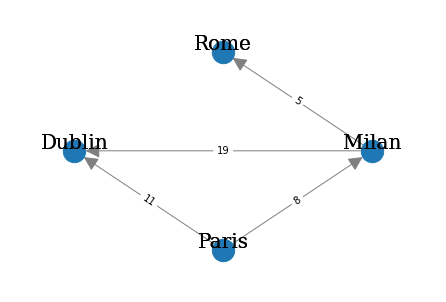

In [108]:
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

## 분리측정지표

`-` 네트워크 내에서 커뮤니티 또는 모듈로 알려진 상호 연결된 노드 그룹의 존재를 정량화

## 중심성측정지표

`-` 네트워크 내부의 개별 노드의 중요성을 평가 

## 탄력성측정지표

`-` 네트워크가 장애 또는 기타 불리한 조건에 직면했을 때 운영 성능을 얼마나 유지하고 조정할 수 있는지 평가

# 국소측정지표  (local metric)

`-` 개별네트워크 요소 (노드 또는 간선)의 값을 측정한다. 